<a href="https://colab.research.google.com/github/manishmawatwal/DataScience/blob/main/Prediction_of_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import csv,sklearn
from subprocess import check_output
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import math

In [ ]:
# upload files on google colab drive
from google.colab import files
uploaded = files.upload()

In [ ]:
data = pd.read_csv("diabetes.csv", sep=',', encoding='latin1')
# display the first 10 lines
data.head(10) 

The dataframe format type will facilitate the use of a wider variety of syntax and methods for data analysis, including describe() and info().

In [ ]:
# return the object type, which is dataframe
type(data)

Data Preprocessing

Data preprocessing is a data mining technique that transforms raw data into an understandable format. This process has four main stages – data cleaning, data integration, data transformation, and data reduction.

Data cleaning will filter, detect, and handle dirty data to ensure quality data and quality analysis results. In this case, there may be noises of impossible and extreme values and outliers, and missing values. The errors may include inconsistent data and redundant attributes and data.

In [ ]:
 '''display the number of entries, number and names of the column attributes, 
    data type and digit placings, and memory space used'''
data.info()

'Outcome' is the target class label, where 0 represents absence and 1 represents presence of diabetes.

In [ ]:
data.shape

Noises of impossible values are checked by analysing the maximum and minimum values using box plots and summary statistics.

data['Outcome'].value_counts() - This function returns the count of unique items in a pandas dataframe.

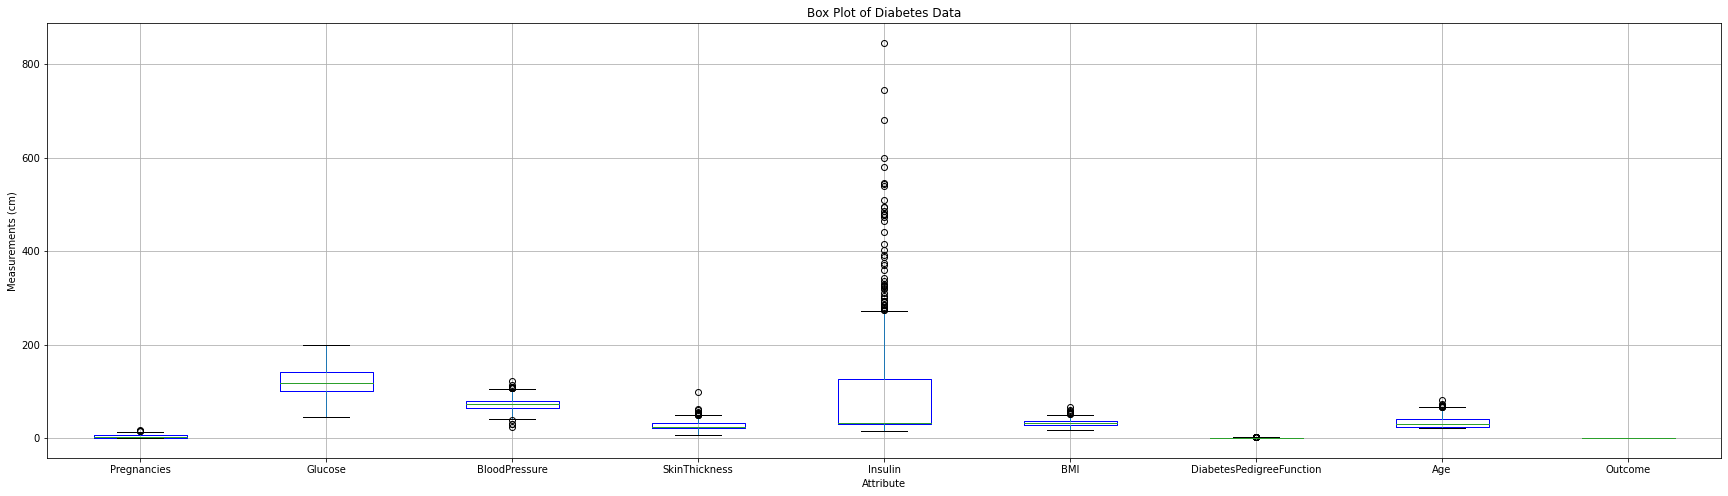

In [70]:
# identify impossible values and outliers using boxplot
data.boxplot(rot = 0, boxprops = dict(color = 'blue'), return_type = 'axes', figsize = (30, 8))
plt.title("Box Plot of Diabetes Data") # title of plot
plt.suptitle("")
plt.xlabel("Attribute") # x axis label
plt.ylabel("Measurements (cm)") # y axis label
plt.show()

In [ ]:
# detect duplicated records
data[data.duplicated(subset = None, keep = False)]

Pairs plot or scatterplot matrix are used to identify and remove attributes with weak class-attribute relationship. This is of most use and interest for classification purposes. Scatter plots on the upper triangle will visualize the relationships between two variables. Kernel density estimate (KDE) plots, which will be discussed in further detail in the next section, will illustrate the univariate distribution of a single variable in relation to the target variable. 2-D kernel density plots on the lower triangle will illustrate the density of single variable in relation to the target variable.

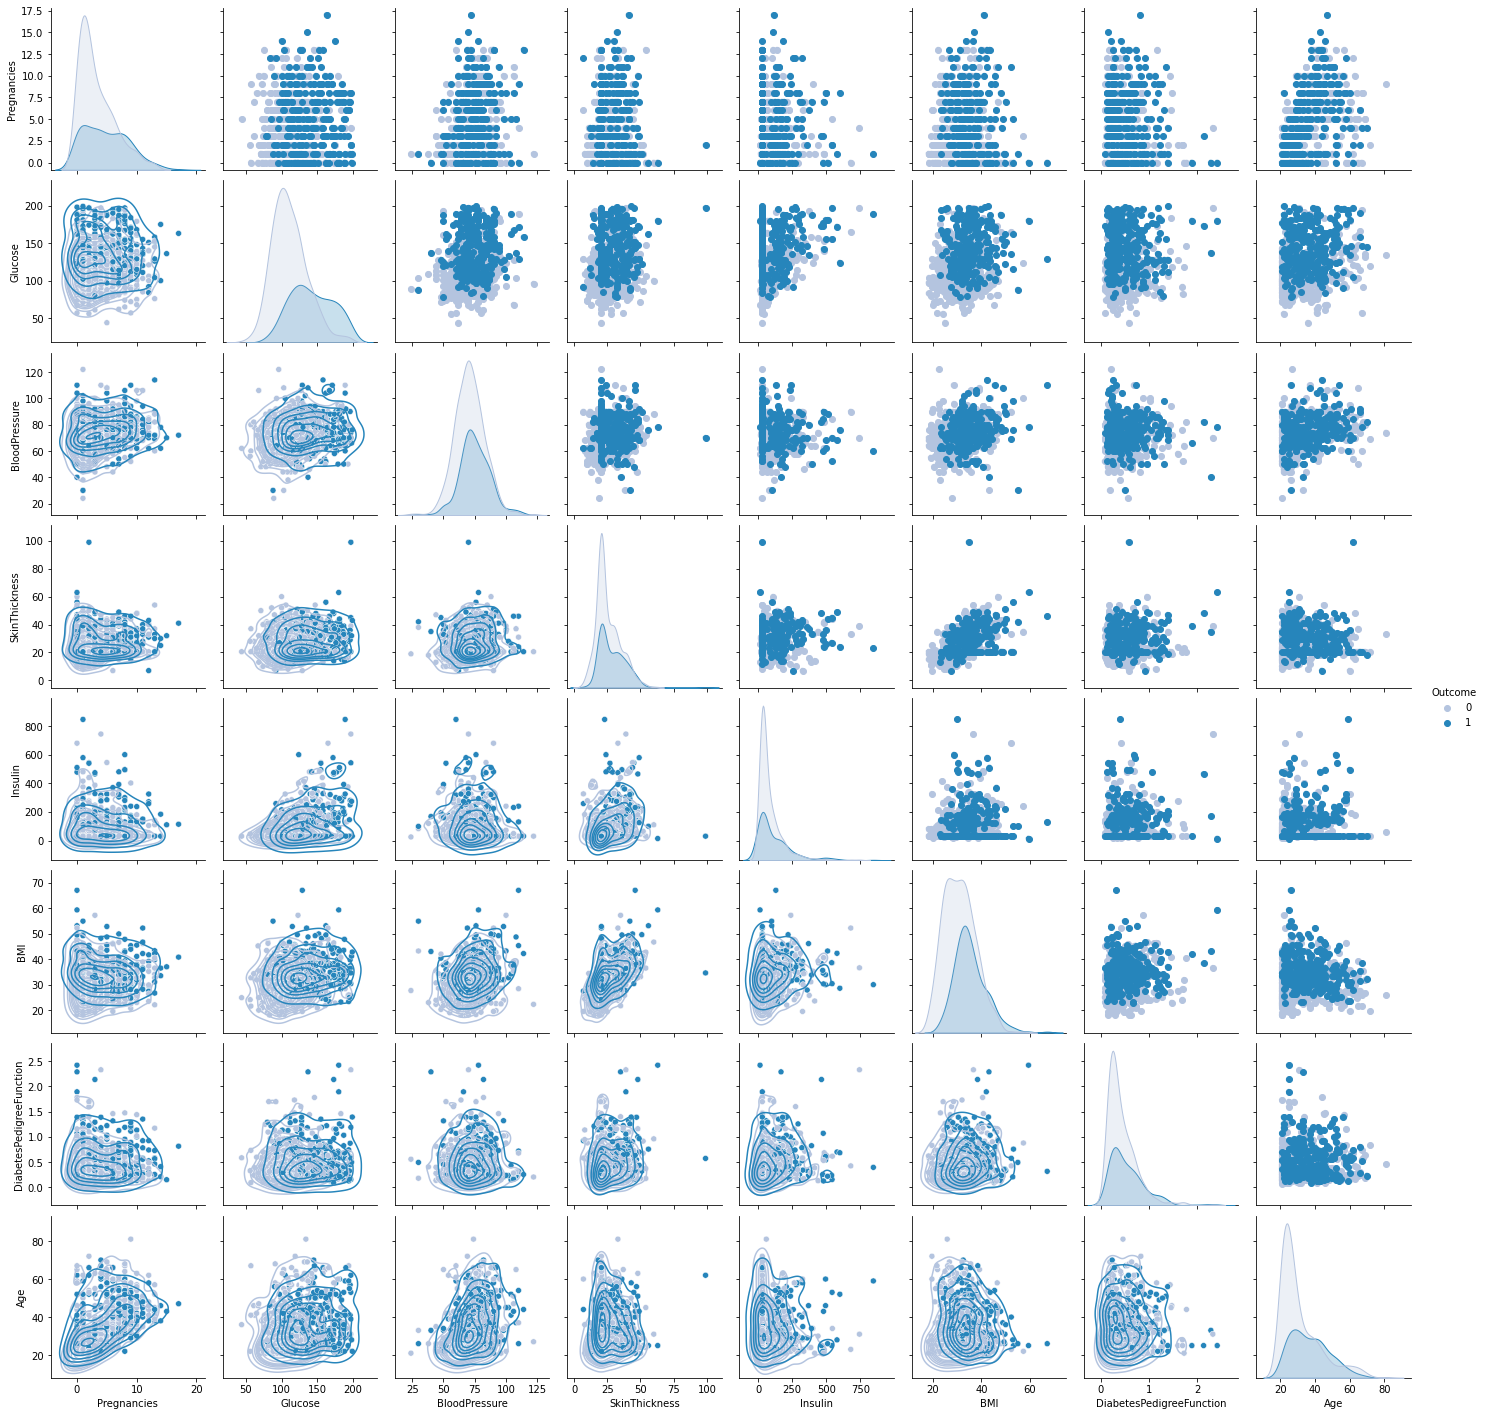

In [73]:
# visualise pairs plot or scatterplot matrix in relation to diabetes outcome
g = sns.pairplot(data, hue = 'Outcome', palette = 'PuBu')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)

Exploratory Data Analysis (EDA)

EDA aims to perform initial investigations on data before formal modeling and graphical representations and visualisations, in order to discover patterns, look over assumptions, and test hypothesis. The summarised information on main characteristics and hidden trends in data can help the doctor to identify concern areas and problems, and the resolution of these can boost their accuracy.

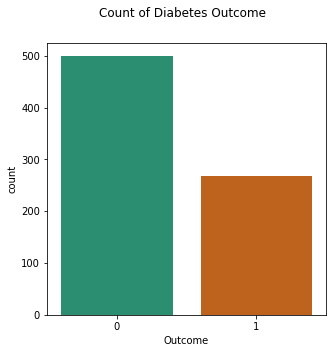

In [75]:
data['Outcome'].value_counts()
plt.figure(figsize = (5, 5))
sns.countplot(x='Outcome', data=data, palette='Dark2')
plt.suptitle("Count of Diabetes Outcome")
plt.show()

Replacing zero values in BMI and Insulin columns with median values

In [66]:
# smooth impossible values/zero values by replacing the values with the median/mean values
data['BMI'] = data['BMI'].replace(0, data.BMI.median())
data['Insulin'] = data['Insulin'].replace(0, data.Insulin.median())
data['SkinThickness'] = data['SkinThickness'].replace(0, data.SkinThickness.mean())
data['Glucose'] = data['Glucose'].replace(0, data.Glucose.mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data.BloodPressure.mean())

Correlation between features/columns in the dataset.

Statistically find relationship between variables using correlation and visualize the correlations using a heatmap.

                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]


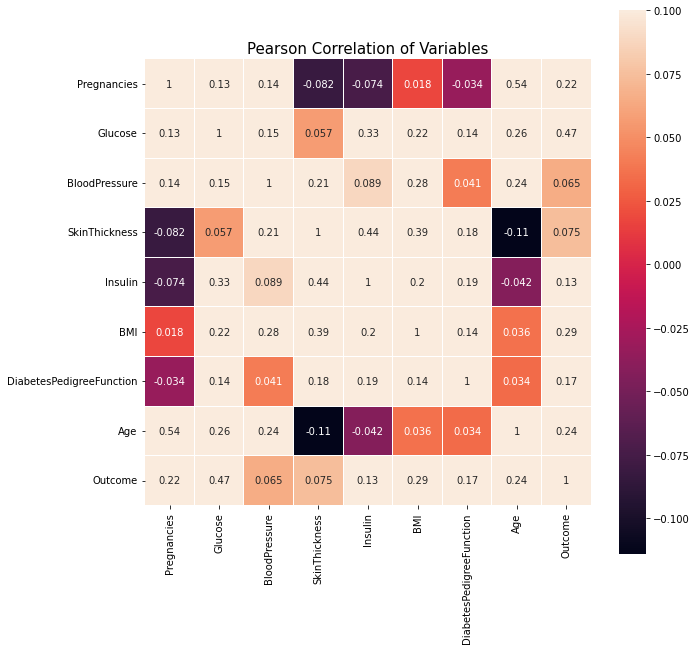

In [61]:
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Variables',y=1, size=15)
print(data.corr())
sns.heatmap(data.corr(),linewidths=0.1,vmax=0.1,square=True,linecolor='white',annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


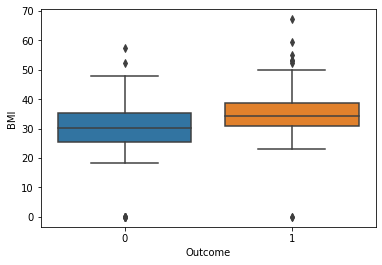

In [12]:
sns.boxplot(data.Outcome, data.BMI)

describe() is used to obtain summary statistics including measures of central tendency such as mean and median, and measures of dispersion such as standard deviation, which are useful in providing a quick and simple description of the dataset and its characteristics.

In [64]:
''' summary statistics of the attributes, including measures of central tendency and 
    measures of dispersion
'''
data.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data Modelling

The dataset is split into two separate sets - the training set and test set. They both consist of the same attributes, but not the same attribute values. The training set is used to train and construct the classification models. The test set is used to predict the classifications of the new unbiased data that were not used to train the model, before evaluating the model performance based on the performance metrics of accuracy, precision, recall, and F1-score of those classifications.

The target labels have uneven distribution. In order to ensure that the training and test sets are unbiased and representative of the two classes, the list of random numbers starting from the random selected position of 987 is used to perform random splitting. An accuracy graph is plotted to find the most accurate training set proportion, after taking the chosen Decision Tree (DT), Naive Bayes (NB), and KNN model scores into consideration.

In [79]:
# train test split
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

Feature Scaling


Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [80]:
sc_X = StandardScaler(with_mean=False)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Implementing Kernel SVM

In [81]:
svc_model = SVC(kernel='rbf',random_state=0)
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [84]:
y_pred = svc_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[118  12]
 [ 30  32]]


The F-score, also called the F1-score, is a measure of a model’s accuracy on a dataset.

f1=2 * (Precision * Recall)/(Precision + Recall)

Precision is the fraction of true positive examples among the examples that the model classified as positive. In other words, the number of true positives divided by the number of false positives plus true positives.

Recall, also known as sensitivity, is the fraction of examples classified as positive, among the total number of positive examples. In other words, the number of true positives divided by the number of true positives plus false negatives.

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       130
           1       0.74      0.56      0.64        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192



Calculate AUC score and plot ROC curve

In general, an AUC of 0.5 suggests no discrimination (i.e., ability to diagnose patients with and without the disease or condition based on the test), 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding.

In [87]:
auc = roc_auc_score(y_test,y_pred)
print("AUC %0.3f" %auc)
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

AUC 0.712


Sensitivity, specificity, predictive values and likelihood ratios (LRs) are all different ways of expressing test performance.

High sensitivity corresponds to high negative predictive value and is the ideal property of a “rule-out” test.

High specificity corresponds to high positive predictive value and is the ideal property of a “rule-in” test.

Receiver operating characteristic (ROC) curves compare sensitivity versus specificity across a range of values for the ability to predict a dichotomous outcome. Area under the ROC curve is another measure of test performance.

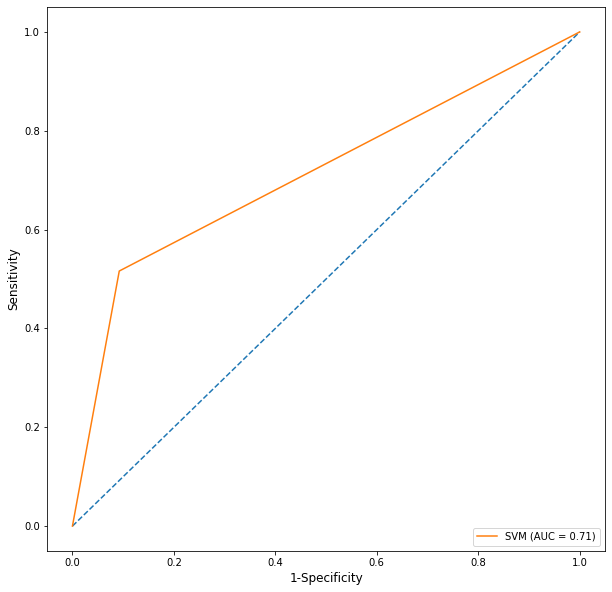

In [89]:
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr, label='SVM (AUC = %0.2f)'% auc)
plt.xlabel("1-Specificity",fontsize=12)
plt.ylabel("Sensitivity",fontsize=12)
plt.legend(loc='lower right')
plt.show()

Model Cross-Validation using GridSearchCV

In [90]:
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(),param_grid,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [91]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[117  13]
 [ 29  33]]


In [92]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       130
           1       0.72      0.53      0.61        62

    accuracy                           0.78       192
   macro avg       0.76      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192



In [94]:
#Calculate AUC Score after GridSearchCV
auc_grid = roc_auc_score(y_test,grid_predictions)
print('AUC: %.3f' % auc_grid)
#Calculate ROC Curve after Grid Search CV
fpr , tpr , thresholds = roc_curve(y_test,grid_predictions)

AUC: 0.716


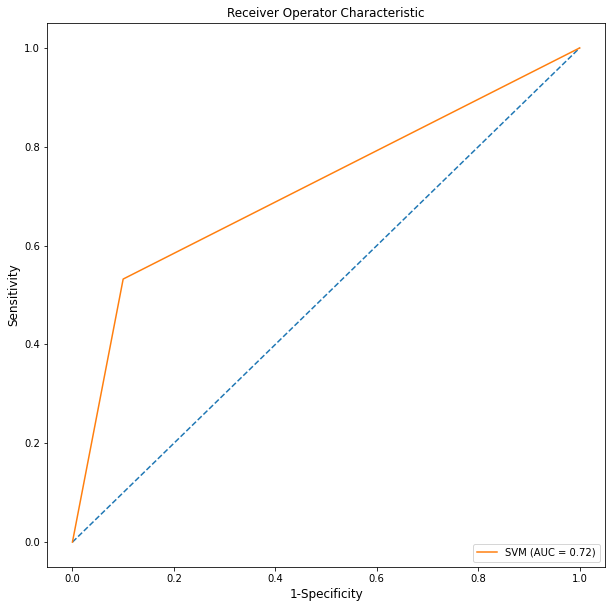

In [95]:
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],linestyle="--")
plt.title('Receiver Operator Characteristic')
plt.plot(fpr,tpr, label='SVM (AUC = %0.2f)'% auc_grid)
plt.xlabel("1-Specificity",fontsize=12)
plt.ylabel("Sensitivity",fontsize=12)
plt.legend(loc='lower right')
plt.show()

Applying k-Nearest Neighbour, Decision Tree, and Naive Bayes

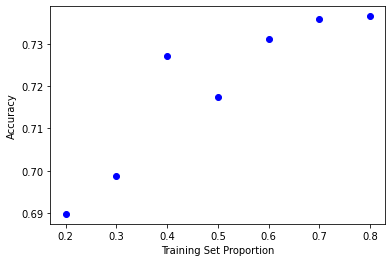

In [96]:
''' classify and model the data using k-Nearest Neighbour (KNN), Decision Tree (DT), and Naive Bayes (NB)
    machine learning algorithms '''

data['Outcome'] = data.Outcome.astype(str)
data['Outcome'] = data.Outcome.astype(object)

# split dataset into attributes and labels
X = data.iloc[:, :-1].values # the attributes
y = data.iloc[:, 8].values # the labels

# choose appropriate range of training set proportions
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

# plot decision tree based on information gain
DT = DecisionTreeClassifier(splitter = 'best', criterion = 'entropy', min_samples_leaf = 2)

# use Gaussian method to support continuous data values
NB = GaussianNB()

# choose recommended optimal number of clusters of sqrt(number of records)
KNN = KNeighborsClassifier(n_neighbors = math.ceil(math.sqrt(768)))

# find best training set proportion for the chosen models
plt.figure()
for s in t:
    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s, random_state = 987)
        DT.fit(X_train, y_train) # consider DT scores
        scores.append(DT.score(X_test, y_test))
        NB.fit(X_train, y_train) # consider NB scores
        scores.append(NB.score(X_test, y_test))
        KNN.fit(X_train, y_train) # consider KNN scores
        scores.append(KNN.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')
plt.xlabel('Training Set Proportion') # x axis label
plt.ylabel('Accuracy'); # y axis label

According to the graph, the training subset should take up 80% of the dataset which is 119 instances, whereas the test subset will take up 20% which is 30 instances. The machine Learning models of DT, NB, and KNN are now fitted to the training dataset.

For the KNN model, the optimal value of k number of nearest neighbours is found by plotting an accuracy graph.

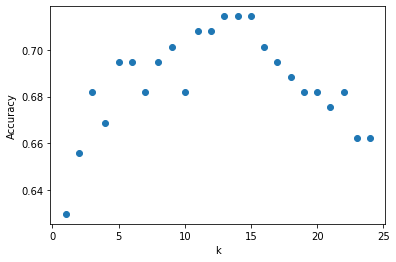

In [97]:
# choose train test splits from original dataset as 80% train data and 20% test data for highest accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=987)

# find optimal k number of clusters
k_range = range(1, 25)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k') # x axis label
plt.ylabel('Accuracy') # y axis label
plt.scatter(k_range, scores) # scatter plot
plt.xticks([0, 5, 10, 15, 20, 25]);

In [98]:
# number of records in training set
len(X_train)

614

the training subset takes up 614 instances, whereas the test subset takes up the remaining 154 instances.

The accuracy graph identifies the optimal value of k as 15 in order to obtain slight above 70% accuracy, the highest possible for this dataset. This is done to obtain a k value that is large enough to minimise error rate and sensitivity to noise, but not too large such that the boundaries are over-smoothed or overfitted with points from the other classes. The chosen k value is also appropriate since 15 is not a multiple of the 2 classes, which is a requirement when selecting k value. The KNN model parameters are thus the value of k of 15, and Euclidean distance metric to compute the distance between data points. The output is the assigned class membership based on the majority vote on the data point’s k number of neighbors.

In [100]:
# using k-Nearest Neighbour (KNN) classifier
# choose 7 as the optimal number of clusters
classifierKNN = KNeighborsClassifier(n_neighbors = 15)
classifierKNN.fit(X_train, y_train)

# using Euclidean distance metric
classifierKNN.effective_metric_

'euclidean'

Gaussian Naïve Bayes is suitable for continuous data types, and the prior probabilities and likelihoods are computed in order to predict the posterior probability of a data point belonging to each of the three classes. The outputs are the aforementioned posterior probabilities, and the assigned class membership is selected as the class with the highest posterior probability.

In [101]:
# using Naive Bayes (NB) classifier
classifierNB = GaussianNB()
classifierNB.fit(X_train, y_train)

# show prior probability of each class
classifierNB.class_prior_

array([0.66449511, 0.33550489])

The class prior indicates the probability of a observation belonging to a specific class if no information was given. The probability of prediction is 66.45% as 0 and only 33.55% as 1.

Decision tree is constructed based on parameters of best split strategy, and the criterion of entropy which utilises information gain to iteratively select the next node according to higher feature importance to optimise the quality of splits. The minimum number of leaves are restricted to 2. The outputs are the classification rules as extracted from the decision tree. These are determined by the flow sequence from the root node and the corresponding branches to the internal or decision nodes, then stopping when the leaf node representing the class label is reached.

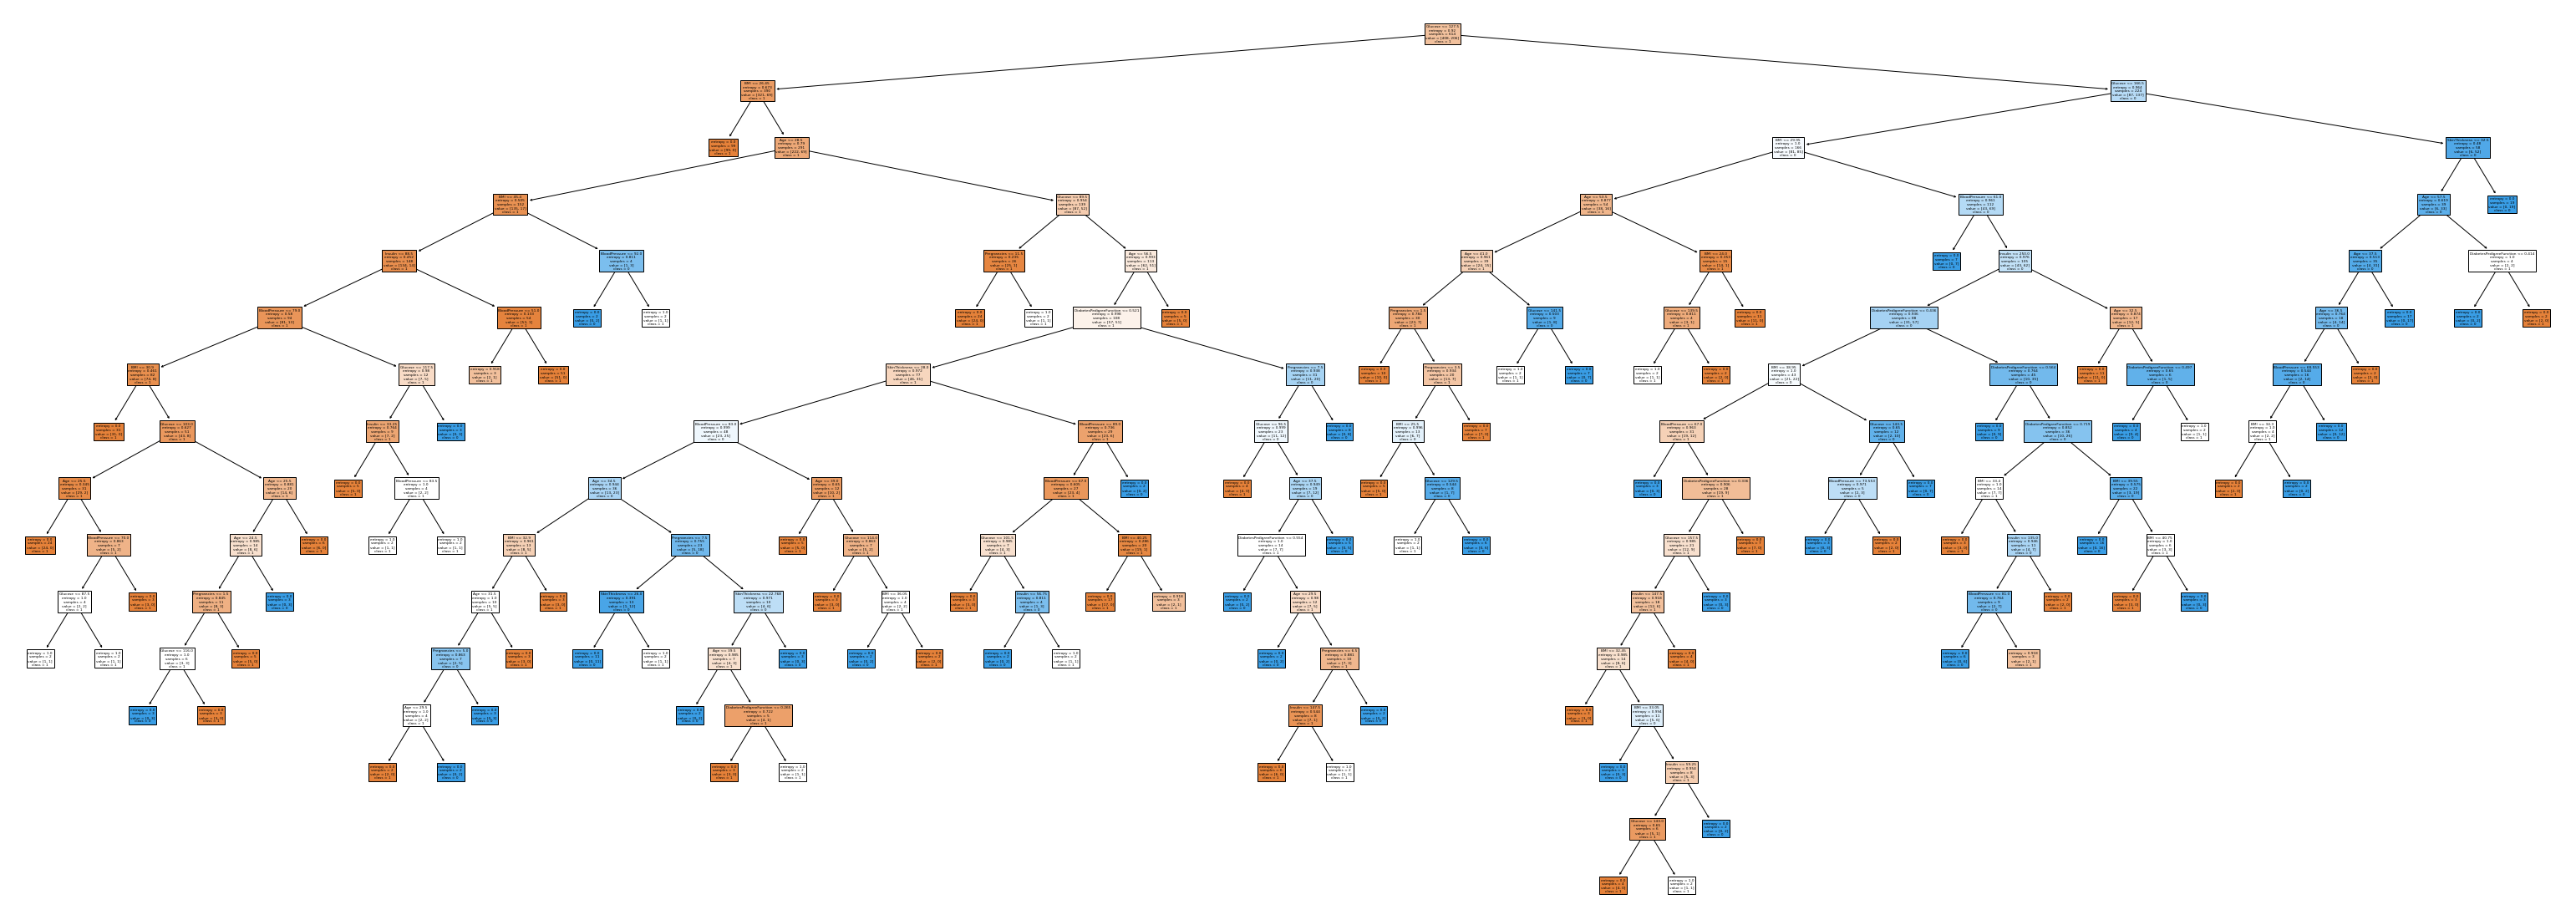

In [102]:
# using Decision Tree (DT) classifier
classifierDT = DecisionTreeClassifier(splitter = 'best', criterion='entropy', min_samples_leaf = 2)
classifierDT.fit(X_train, y_train)

# plot decison tree
from sklearn import tree
fig = plt.figure(figsize = (55, 20))
fn = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
DT = tree.plot_tree(classifierDT, feature_names = fn, class_names = y, filled = True)
# outputs all extracted rules

Feature importance will calculate the decrease in node impurity weighted by the probability of reaching that node. The node probability is the number of samples that reach the node, divided by the total number of samples. Higher values indicate higher feature importance in the DT prediction model.

In [103]:
# identifies the important features
classifierDT.feature_importances_

array([0.0629845 , 0.30995755, 0.09635663, 0.02881503, 0.0510521 ,
       0.20510262, 0.05877955, 0.18695202])

Model Evaluation

The model performance is evaluated and validated by using the test set of 154 records to predict the classifications of these new unbiased data that were not used to train the model. The confusion matrix is then used to determine the performance metrics of accuracy, precision, recall, and F1-score, based on those classifications. The supports are 92 instances for the target class label of 0 and 62 for 1. This process ensures that the models are useful by being generalisable even when the specific training data used is extended to include new test data, or in technical terms ‘avoid over fitting’.

In [104]:
# use the chosen three models to make predictions on test data
y_predKNN = classifierKNN.predict(X_test)
y_predDT = classifierDT.predict(X_test)
y_predNB = classifierNB.predict(X_test)

In [105]:
# for k-Nearest Neighbours model
# using confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predKNN))
print(classification_report(y_test, y_predKNN))

# using accuracy performance metric
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, classifierKNN.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predKNN))

[[78 14]
 [30 32]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        92
           1       0.70      0.52      0.59        62

    accuracy                           0.71       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.71      0.71      0.70       154

Train Accuracy:  0.7882736156351792
Test Accuracy:  0.7142857142857143


In [106]:
# for Naive Bayes model
# using confusion matrix
print(confusion_matrix(y_test, y_predNB))
print(classification_report(y_test, y_predNB))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierNB.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predNB))

[[76 16]
 [23 39]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        92
           1       0.71      0.63      0.67        62

    accuracy                           0.75       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.74      0.75      0.74       154

Train Accuracy:  0.757328990228013
Test Accuracy:  0.7467532467532467


In [107]:
# for Decision Tree model
# using confusion matrix
print(confusion_matrix(y_test, y_predDT))
print(classification_report(y_test, y_predDT))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierDT.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predDT))

[[76 16]
 [22 40]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.80        92
           1       0.71      0.65      0.68        62

    accuracy                           0.75       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.75      0.75      0.75       154

Train Accuracy:  0.9706840390879479
Test Accuracy:  0.7532467532467533


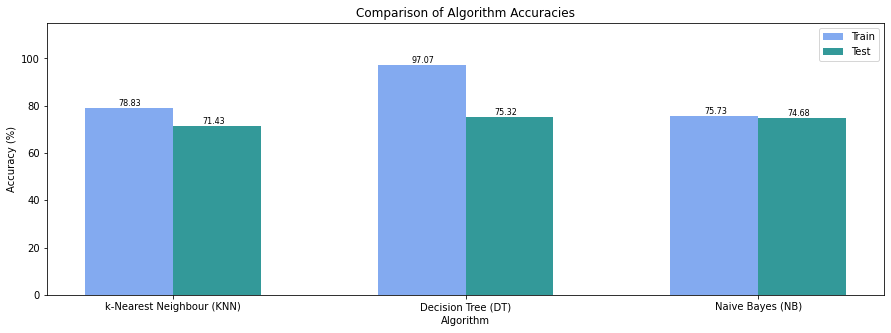

In [108]:
# data to plot
n_groups = 3
algorithms = ('k-Nearest Neighbour (KNN)', 'Decision Tree (DT)', 'Naive Bayes (NB)')
train_accuracy = (accuracy_score(y_train, classifierKNN.predict(X_train))*100, 
                  accuracy_score(y_train, classifierDT.predict(X_train))*100, 
                  accuracy_score(y_train, classifierNB.predict(X_train))*100)
test_accuracy = (accuracy_score(y_test, y_predKNN)*100, 
                 accuracy_score(y_test, y_predDT)*100, 
                 accuracy_score(y_test, y_predNB)*100)

# create plot
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
rects1 = plt.bar(index, train_accuracy, bar_width, alpha = opacity, color='Cornflowerblue', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha = opacity, color='Teal', label='Test')
plt.xlabel('Algorithm') # x axis label
plt.ylabel('Accuracy (%)') # y axis label
plt.ylim(0, 115)
plt.title('Comparison of Algorithm Accuracies') # plot title
plt.xticks(index + bar_width * 0.5, algorithms) # x axis data labels
plt.legend(loc = 'upper right') # show legend
for index, data in enumerate(train_accuracy):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(test_accuracy):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
plt.show()

NB model has the overall performance metrics of 74.68% accuracy, 74% precision and F1-score, and 75% recall. The KNN model achieved worse as 70.13% accuracy, 70% precision and recall, and 69% F1-score. On the other hand, the overall performance metrics of the DT model is the best, with 78.57% accuracy, 78% precision and F1-score, and 79% recall. For all three chosen models, the diabetes outcome that was best classified is 0.

Next, the degree of overfitting must also be taken into consideration before the best model is chosen. Disregarding KNN due to its comparatively poor overall performance metrics, NB model only has a small difference between the train and test accuracy and thus no overfitting, and the 74.68% train accuracy indicates that the learnt rules are not specific for the train set and will generalize well beyond the train set to the test set. Due to this, NB is chosen as the final best model over DT, since DT overfits the data with a large difference between the train and test accuracy.

Accuracy indicates the overall proportion of correct predictions for all the three classes. The train accuracy is measured based on examples that the model was constructed on, while the test accuracy is based on those it has yet to see. NB achieved 74.68% for both train accuracy and test accuracy.

However, it will be misleading to solely base decisions on this, as the dataset used is relatively small and biased. Recall and precision metrics are thus also considered to measure model performance.

Recall indicates the proportion of correct predictions for each individual class, out of the corresponding actual class. In other words, the proportion of all actual classes that were predicted correctly. It was found that 75% of all actual classes were predicted correctly by NB.

Precision indicates the proportion of correct predictions for each individual class, out of the corresponding predicted class. In other words, the proportion of all predicted classes were actually predicted correctly. It was found that 74% of all predicted classes were actually predicted correctly by NB.

However, recall and precision have an inverse relationship. In order to make them comparable for cases where they are both important, F1 score is introduced. F1-score, also known as F-score or F-measure, is used to make precision and recall comparable in cases where they are both important, by measuring their harmonic mean. This allows it to consider both metrics and punish extreme values more heavily. F-score is more useful for biased datasets that are common in real-life scenarios, as well as in this case study. This occurs when the counts of, in this case FP of 20 and FN of 13, are very different, but they must still be properly considered since they are crucial conditions in the prediction. False negative (FN) and false positive (FP) are both the worst error in diabetes prediction, as the implications of a wrong classification for a FN for a patient misdiagnosed as not having diabetes is that the patient to lose out on immediate treatment and medications and may lead to death if the mistake is discovered too late. On the other hand, a FP for a patient misdiagnosed as having diabetes will cause the patient to be subjected to unneeded treatments and medications which may lead to other health problems. Therefore, F-score will compute the overall quality of translations produced by the chosen machine learning engine, which is 74% by the NB model.

The confusion matrix tabulates the predicted class vertically and the actual class horizontally.

In conclusion, the NB model is chosen as the final model for the prediction of diabetes outcome.

Model Interpretation
The final crucial step of a data science project is the interpretation of the models and data, in terms of its predictive power and thus its ability to generalise unseen future data.

The NB model is now ready to be deployed to predict new value instances. To do so, a data frame is created to describe the characteristics of a number of diabetes factors. The maximum and minimum values of each feature is considered before creating the data frame, in order to ensure that all values are reliable and acceptable.

In [109]:
# new data
newdata = [[1, 50, 80, 33, 70, 30, 0.55, 20]]

# compute probabilities of assigning to each of the two classes of outcome
probaNB = classifierNB.predict_proba(newdata)
probaNB.round(4) # round probabilities to four decimal places, if applicable

array([[0.9887, 0.0113]])

In [110]:
# make prediction of class label
predNB = classifierNB.predict(newdata)
predNB

array(['0'], dtype='<U1')

The predicted class for the specified example is assigned as 0, as its probability of 98.92% is almost equal to a 100% certainty and very much higher that that of class 0 of diabetes outcome. It is also safe to intepret this result as having 74.68% accuracy, 74% precision and F1-score, and 75% recall, based on the NB model's performance metrics.

Possible improvements can be to include other strong predictors of diabetes outcome outside of the aforementioned 8, such as weight and skin dryness. The presence of these symptoms can be very relevant and thus useful to include in the model design.

The End